# Introducción a la estadística.

En este módulo veremos los conceptos básicos de estadística descriptiva y algunos temas de nivel intermedio.

## Estadística descriptiva.

Empezaremos usando una lista de números a la cual le calcularemos la media, mediana, moda, varianza y desviación estándar.

La media de un conjunto de números $\{x_1,\ldots,x_n\}$ está dada por

$\bar{x}=\frac{1}{n}\sum_{i=1}^n x_i.$

La media es una cantidad cuyo valor es una medida alrededor de la cual la mayoría de los demás números están ubicados (suponiendo una distribución normal que se verá más adelante).

Vamos a crear una lista de números de 10 elementos.

In [50]:
from numpy import *
import matplotlib.pyplot as plt

In [51]:
x=random.normal(100.0, 20, 500)

Ahora vamos a calcular la media usando directamente nuestra definición de media:

In [52]:
n=len(x)
xb=sum(x)/float(n) #La funcion sum realiza la sumatoria de los elementos de la lista x
print(xb)

100.25348972251572


Ahora podemos calcular las dos principales medidas de dispersión: la varianza y la desviación estándar. La varianza de un conjunto de números $\{x_1,\ldots,x_n\}$ está dada por

$s=\frac{1}{n}\sum_{i=1}^n (x_i-\bar{x})^2.$

Y la desviación estándar es

$de=\sqrt{s}.$

In [53]:
s=0.0
for i in x:
    s=s+(i-xb)**2
s=s/(n)
print("Varianza = ",s)
de=sqrt(s)
print('Desv. est. = ',de)

Varianza =  394.69564163368676
Desv. est. =  19.866948473122054


## Ahora vamos a usar las funciones predefinidas en el paquete numpy.
Las funciones que usaremos pertenecen al paquete numpy que importamos al inicio.

In [54]:
med=mean(x)
print(med)

100.25348972251572


In [55]:
varianza=var(x)
print(varianza)
des=std(x)
print(des)

394.6956416336871
19.866948473122065


Con estos resultados confirmamos que los resultados obtenidos con las funciones de numpy coinciden con las obtenidas de manera directa implementando las fórmulas de estadística.

## Interpretación de los resultados.

Ya que conocemos la media y la desviación estándar de un conjunto de datos, debemos tener en mente qué es lo que significan. Para esto, veamos primero el histograma de nuestro conjunto de datos. Un histograma es una lista de las frecuencias de los datos que están en ciertos intervalos que se construyen en función del conjunto de datos disponible. La forma de construir los bins es todo un tema, pero por el momento usaremos la opción automática de la función.

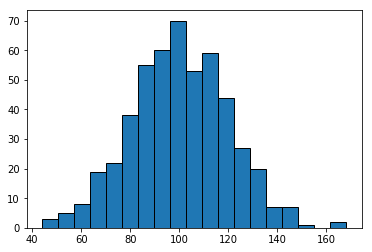

In [56]:
plt.hist(x, bins='auto', edgecolor='k')
plt.plot(x=100)
plt.show()

Esta grafica que hemos obtenido es lo que se llama un histograma de los datos almacenados en la lista x. La altura de cada rectángulo representa la frecuencia del dato correspondiente al valor sobre el cual está la base del rectángulo. Así podemos ver que los datos más frecuentes están alrededor de 100. Esto es lo que nos indica el valor de la media que obtuvimos anteriormente. Esto es, la media es el valor alrededor del cual están la mayoría de los datos. Por otra parte la desviación estándar es la media de las distancias de los datos con respecto a la media de los datos.

Hay otros dos parámetros que se pueden calcular para describir estadísticamente un conjunto de datos. Estos son la mediana y la moda.

In [57]:
print(median(x))

100.08878910509665


In [58]:
h=histogram(x, bins='auto')
print(h)
l=list(h[0])
m=l.index(max(l))
moda=h[1][m]
print('moda =',moda)

(array([ 3,  5,  8, 19, 22, 38, 55, 60, 70, 53, 59, 44, 27, 20,  7,  7,  1,
        0,  2]), array([ 44.03505382,  50.56857471,  57.10209559,  63.63561648,
        70.16913736,  76.70265825,  83.23617913,  89.76970002,
        96.3032209 , 102.83674179, 109.37026267, 115.90378356,
       122.43730444, 128.97082533, 135.50434621, 142.0378671 ,
       148.57138798, 155.10490886, 161.63842975, 168.17195063]))
moda = 96.30322090170037


## Inferencia estadística.
La inferencia estadıstica es el proceso de deducir las propiedades de una distribucion intrınseca mediante el analisis de datos. Se busca deducir o inferir propiedades de una poblacion a partir de muestras.

La inferencia estadıstica se divide en:

**Estimación** que se enfoca en estimar los valores especıficos correspondientes a los parametros de una poblacion. Es decir, se busca calcular los valores de los parametros. 

**Pruebas de hipótesis** que consiste en probar si el valor de un parametro de una poblacion es igual a algún valor específico. En este caso se busca poner a prueba la hipótesis de si un parámetro tiene un cierto valor.

## Estimación.

Una **muestra aleatoria** es una seleccion de algunos miembros de la poblacion tal que cada miembro es independientemente elegido y tiene una probabilidad conocida no nula de ser elegido. 

Una **muestra aleatoria simple** es una muestra aleatoria en la cual cada miembro del grupo tiene
la misma probabilidad de ser elegido.

**Población objetivo** También denominada de referencia o de estudio, es el grupo que se desea estudiar. Comprende a todos los miembros del grupo de interés y en muchas ocasiones no esta disponible en su totalidad para ser analizada.

En la lista x tenemos a nuestra población objetivo, ahora obtendremos tres muestras aleatorias usando la función random.choice() de numpy. 

In [59]:
m1=random.choice(x,50)
m2=random.choice(x,50)
m3=random.choice(x,50)

Estas muestras son muestras aleatorias simples, es decir cada elemento de x tiene la misma probabilidad de ser elegido.

Ahora veamos cual es la media y desviación estándar de cada muestra.

In [60]:
print(mean(m1),std(m1),'\n',mean(m2),std(m2),'\n',mean(m3),std(m3))

102.07746531162353 18.910625209339305 
 96.57898398373018 17.592719502522232 
 100.70955446204128 18.244295217463243


Ahora veamos cómo cambian estás estimaciones si modificamos la probabilidad de las muestras aleatorias, esto es si no son muestras aleatorias simples. 

Para esto necesitamos asignar una probabilidad a cada elemento de x. Supongamos que nos interesa asignarles una probabilidad gaussiana, entonces debemos usar la función de densidad de probabilidad de la distribución normal para obtener las probabilidades de los elementos de x.

$f(x,\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$.

In [74]:
p=[]
denom=sqrt(2.0*pi*varianza)
d=(2.0*varianza)
for i in range(len(x)):
    f=exp(-float(x[i]-med)**2/d)/denom
    p.append(f)

In [75]:
s1=random.choice(x,50,p)
s2=random.choice(x,50,p)
s3=random.choice(x,50,p)

In [76]:
print(mean(s1),std(s1),'\n',mean(s2),std(s2),'\n',mean(s3),std(s3))

104.58616206039231 22.658368281061197 
 104.72876774950853 22.809618357278932 
 100.40028852223647 19.252694564310524
